##### Copyright 2018 The TensorFlow Probability Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Distributions 浅析

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/probability/examples/TensorFlow_Distributions_Tutorial"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a>   </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a>
</td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 Github 上查看源代码</a>   </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>   </td>
</table>

在此笔记本中，我们将探索 TensorFlow Distributions（简称为 TFD）。此笔记本的目标是用通俗易懂的方式让您了解学习曲线，包括了解 TFD 对张量形状的处理。此笔记本尝试先列举示例，而不是介绍抽象的概念。我们首先介绍执行操作时公认的简单方式，而将最基本的抽象概念留到最后。如果您更偏爱较抽象的参考教程，请参阅[了解 TensorFlow Distributions 形状](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)。如果对本文介绍的内容有任何疑问，请随时联系（或加入）[TensorFlow Probability 邮寄名单](https://groups.google.com/a/tensorflow.org/forum/#!forum/tfprobability)。我们非常乐意为您提供帮助。

首先，我们需要导入相应的库。我们的整个库为 `tensorflow_probability`。按照惯例，我们通常将该分布库称为 `tfd`。

[Tensorflow Eager](https://tensorflow.google.cn/guide/eager) 是 TensorFlow 的命令式执行环境。在 TensorFlow Eager 中，每个 TF 运算都会立即得到计算并生成结果。这与 TensorFlow 的标准“计算图”模式形成对比，在“计算图”模式下，TF 运算会将节点添加到稍后执行的计算图中。整个笔记本使用 TF Eager 编写，但是本文介绍的任何概念都与其无关，并且 TFP 可以在计算图模式下使用。

In [ ]:
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

## 基本的一元分布


我们立即创建一个正态分布：

In [3]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

我们可以通过它绘制一个样本：

In [4]:
n.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.25322816>

我们可以绘制多个样本：

In [5]:
n.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4658079, -0.5653636,  0.9314412], dtype=float32)>

我们可以计算一个对数概率：

In [6]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

我们可以计算多个对数概率：

In [7]:
n.log_prob([0., 2., 4.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9189385, -2.9189386, -8.918939 ], dtype=float32)>

存在各种各样的分布。我们试一试伯努利分布：

In [8]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [9]:
b.sample()

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [10]:
b.sample(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)>

In [11]:
b.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.35667497>

In [12]:
b.log_prob([1, 0, 1, 0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.35667497, -1.2039728 , -0.35667497, -1.2039728 ], dtype=float32)>

## 多元分布

我们使用对角协方差创建一个多元正态分布：

In [13]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

将此分布与我们之前创建的一元正态分布进行比较，看看有什么不同？ 

In [14]:
tfd.Normal(loc=0., scale=1.)

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

我们发现，一元正态分布的 `event_shape` 为 `()`，表明这是标量分布。多元正态分布的 `event_shape` 为 `2`，表明此分布的基本[事件空间](https://en.wikipedia.org/wiki/Event_(probability_theory))为二维空间。

抽样的工作方式与以前相同：

In [15]:
nd.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2489667, 15.025171 ], dtype=float32)>

In [16]:
nd.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.5439653 ,  8.9968405 ],
       [-0.38730723, 12.448896  ],
       [-0.8697963 ,  9.330035  ],
       [-1.2541095 , 10.268944  ],
       [ 2.3475595 , 13.184147  ]], dtype=float32)>

In [17]:
nd.log_prob([0., 10])

<tf.Tensor: shape=(), dtype=float32, numpy=-3.2241714>

多元正态分布通常没有对角协方差。通过 TFD，可以采用多种方式创建多元正态分布，包括完全协方差规范（由协方差矩阵的 Cholesky 因子参数化），也就是我们在本文中使用的规范。

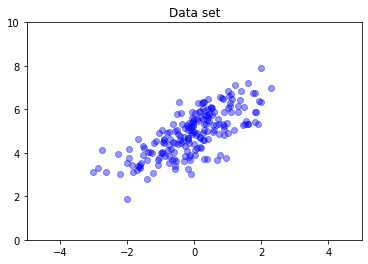

In [18]:
covariance_matrix = [[1., .7], [.7, 1.]]
nd = tfd.MultivariateNormalTriL(
    loc = [0., 5], scale_tril = tf.linalg.cholesky(covariance_matrix))
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## 多个分布

我们介绍的第一个伯努利分布表示公平地抛掷一枚硬币。我们也可以在一个 `Distribution` 对象中创建一批独立的伯努利分布，每个分布具有自己的参数：

In [19]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

重要的是弄清楚其具体含义。上述调用定义了三个独立的伯努利分布，它们恰好都在同一个 Python `Distribution` 对象中。这三个分布无法分别操作。请注意，`batch_shape` 为 `(3,)`，表明该批次包含三个分布，`event_shape` 为 `()`，表明各个分布具有一元事件空间。

如果我们调用 `sample`，将得到所有这三个分布的样本：

In [20]:
b3.sample()

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>

In [21]:
b3.sample(6)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)>

如果调用 `prob`（其形状语义与 `log_prob` 相同；为了清楚起见，我们将 `prob` 与这些小的伯努利示例结合使用，但是 `log_prob` 通常更适合在应用中使用），我们可以向其传递一个向量，并计算抛掷每个硬币时得到该值的概率：

In [22]:
b3.prob([1, 1, 0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

API 为何会包含批次形状？从语义上来讲，API 可以创建一组分布并使用 `for` 循环（至少在 Eager 模式下如此；在 TF 计算图模式下，需要使用 `tf.while` 循环）对这些分布进行迭代，从而执行相同的计算。但是，极为常见的情况是一组（可能较大的）分布采用相同的参数设置；为了能够使用硬件加速器快速进行计算，关键要素是尽可能使用向量化计算。

## 使用 Independent 将批次汇总到事件

在上一部分中，我们创建了单个 `Distribution` 对象 `b3`，它表示抛掷硬币三次。如果我们在向量 $v$ 上调用 `b3.prob`，第 $i$ 个条目就是抛掷第 $i$ 枚硬币时得到的值为 $v[i]$ 的概率。

假设我们改为对同一底层系列中的独立随机变量指定“联合”分布。这是不同的数学对象，因为在这个新分布中，向量 $v$ 的 `prob` 将返回单个值，表示抛掷整组硬币时得到的值均为向量 $v$ 的概率。

我们如何实现这个目标呢？我们使用名为 `Independent` 的“高阶”分布，它获取一个分布，并得到一个批次形状移动至事件形状的新分布：

In [23]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[] event_shape=[3] dtype=int32>

将该形状与原始 `b3` 的形状进行比较：

In [24]:
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

如前所述，我们发现 `Independent` 已将批次形状移动至事件形状：`b3_joint` 是三维事件空间 (`event_shape = (3,)`) 上的单一分布 (`batch_shape = ()`)。

我们检查语义：

In [25]:
b3_joint.prob([1, 1, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999998>

通过另一种方式也可以获得相同的结果，也就是使用 `b3` 计算概率，并通过乘法（或者采用更常见的做法，即使用对数概率，求和）手动简化：

In [26]:
tf.reduce_prod(b3.prob([1, 1, 0]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999994>

借助 `Indpendent`，用户可以更明确地表示所需的概念。我们将其视为极为有用的标记，但是它并不完全必要。

以下事实较为有趣：

- `b3.sample` 和 `b3_joint.sample` 采用不同的概念实现，但输出无区别：在计算概率时，使用 `Independent` 基于批次生成的一批独立分布与单个分布之间存在差异，但在抽样时，这两种分布之间没有差别。
- 可以使用标量 `Normal` 和 `Independent` 分布轻松实现 `MultivariateNormalDiag`（实际上不会以这种方式来实现它，但可以这么做）。


## 多元分布的批次

我们创建一个批次，其中包含三个完全协方差的二维多元正态分布： 

In [27]:
covariance_matrix = [[[1., .1], [.1, 1.]], 
                      [[1., .3], [.3, 1.]],
                      [[1., .5], [.5, 1.]]]
nd_batch = tfd.MultivariateNormalTriL(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    scale_tril = tf.linalg.cholesky(covariance_matrix))
nd_batch

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[3] event_shape=[2] dtype=float32>

我们发现 `batch_shape = (3,)`，因此，有三个独立的多元正态分布；`event_shape =  (2,)`，因此，每个多元正态分布均为二维分布。在本例中，单个分布没有独立的元素。

抽样如下：

In [28]:
nd_batch.sample(4)

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ 0.7367498 ,  2.730996  ],
        [-0.74080074, -0.36466932],
        [ 0.6516018 ,  0.9391426 ]],

       [[ 1.038303  ,  0.12231752],
        [-0.94788766, -1.204232  ],
        [ 4.059758  ,  3.035752  ]],

       [[ 0.56903946, -0.06875849],
        [-0.35127294,  0.5311631 ],
        [ 3.4635801 ,  4.565582  ]],

       [[-0.15989424, -0.25715637],
        [ 0.87479895,  0.97391707],
        [ 0.5211419 ,  2.32108   ]]], dtype=float32)>

由于 `batch_shape = (3,)` 并且 `event_shape = (2,)`，我们将形状张量 `(3, 2)` 传递给 `log_prob`：

In [29]:
nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.8328519, -1.7907217, -1.694036 ], dtype=float32)>

## 广播（也可以说这为何让人如此困惑？）

到目前为止，我们所执行的操作可以抽象概括为，每个分布都有一个批次形状 `B` 和一个事件形状 `E`。令 `BE` 作为事件形状的串联：

- 对于一元标量分布 `n` 和 `b`，`BE = ()`。
- 对于二维多元正态分布 `nd`，`BE = (2)`。
- 对于 `b3` 和 `b3_joint`，`BE = (3)`。
- 对于多元正态分布批次 `ndb`，`BE = (3, 2)`。

到目前为止，我们使用的“计算规则”如下：

- 没有参数的样本将返回形状为 `BE` 的张量；标量为 n 的抽样将返回张量“n * `BE`”。
- `prob` 和 `log_prob` 使用形状为 `BE` 的张量，并返回形状为 `B` 的结果。

`prob` 和 `log_prob` 的实际“计算规则”更复杂，虽然性能和速度可能不错，但同时也增加了复杂性和挑战。实际规则（本质上）是 <strong data-md-type="double_emphasis">{nbsp}`log_prob` 的参数<em data-md-type="emphasis">必须</em>可以根据 <code data-md-type="codespan">BE</code> <a href="https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html" data-md-type="link">进行广播</a>；输出中会预留“额外”维度。</strong> 

我们来探索具体含义。对于一元正态分布 `n`，`BE = ()`，因此，`log_prob` 应该为标量。如果我们向 `log_prob` 传递具有非空形状的张量，它们在输出中将显示为批次维度：

In [30]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [31]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [32]:
n.log_prob([0.])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9189385], dtype=float32)>

In [33]:
n.log_prob([[0., 1.], [-1., 2.]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.9189385, -1.4189385],
       [-1.4189385, -2.9189386]], dtype=float32)>

我们转到二维多元正态分布 `nd`（为了便于阐述，对参数进行了更改）：

In [34]:
nd = tfd.MultivariateNormalDiag(loc=[0., 1.], scale_diag=[1., 1.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

`log_prob`“应该”使用形状为 `(2,)` 的参数，但它将接受根据此形状广播的任何参数： 

In [35]:
nd.log_prob([0., 0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

不过，我们可以传入“更多”示例，并同时计算所有 `log_prob`：

In [36]:
nd.log_prob([[0., 0.],
             [1., 1.],
             [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

说服力可能还不够强，我们可以在事件维度上广播：

In [37]:
nd.log_prob([0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

In [38]:
nd.log_prob([[0.], [1.], [2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

这样广播后，我们最后得到了“尽可能广播”的设计；这种用法存在一些争议，在以后的 TFP 版本中可能会被移除。

现在，我们再来看看三枚硬币的示例：

In [ ]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])

在此，可以非常直观地使用广播来表示*每*一枚硬币正面朝上的概率：

In [40]:
b3.prob([1])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.7       ], dtype=float32)>

（将其与 `b3.prob([1., 1., 1.])` 进行比较，我们在前面介绍 `b3` 时使用过后者。）

现在，假设我们想知道，对于每一枚硬币，硬币正面朝上的概率*和*背面朝上的概率。我们可以尝试：

`b3.log_prob([0, 1])`

遗憾的是，这样会得到错误，其中包含可辨识度较低的长堆栈轨迹。对于 `b3`，`BE = (3)`，因此，我们必须向 `b3.prob` 传递可根据 `(3,)` 进行广播的内容。`[0, 1]` 的形状为 `(2)`，因此，它不会广播，也不会生成错误。相反，我们必须使用：

In [41]:
b3.prob([[0], [1]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.7, 0.5, 0.3],
       [0.3, 0.5, 0.7]], dtype=float32)>

原因是 `[[0], [1]]` 的形状为 `(2, 1)`，因此，它会根据形状 `(3)` 广播，从而生成 `(2, 3)` 的广播形状。

广播非常有用：在有些情况下，广播可以大幅减少所使用的内存量，并且通常可以缩短用户代码。但是，广播对程序来说是一项挑战。如果调用 `log_prob` 并得到错误，问题几乎总是广播失败。

## 延伸内容

在本教程中，我们进行了简单介绍（希望如此）。作为延伸内容，有以下几点建议：

- `event_shape`、`batch_shape` 和 `sample_shape` 可以是任意秩（在本教程中，它们始终为标量或秩 1）。这可以提高性能，但也会为编程带来挑战，特别是在涉及到广播时。要想深入了解形状操作，请参阅 [了解 TensorFlow Distributions 形状](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)。
- TFP 包含一个强大的抽象概念 `Bijectors`，将该概念与 `TransformedDistribution` 结合使用，可以轻松灵活地创建新的分布，这些分布是现有分布的可逆转换。我们很快会尝试编写相关的教程，但目前可以参阅[本文档](https://tensorflow.google.cn/probability/api_docs/python/tfp/distributions/TransformedDistribution)。
